# **Data Loading**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv(r'/content/electrical_demand_2024.csv')

In [ ]:
df.head()

date  hour      Demand
0  01-01-2024     0  355.341456
1  01-01-2024     1  326.427360
2  01-01-2024     2  302.551524
3  01-01-2024     3  279.794880
4  01-01-2024     4  257.784348

In [ ]:
df.shape

(8784, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8784 non-null   object 
 1   hour    8784 non-null   int64  
 2   Demand  8784 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.0+ KB


In [ ]:
df.isnull().sum()

date      0
hour      0
Demand    0
dtype: int64

# **Feature Engineering**

extract: day, year, month_name, month, day_name from DATE column


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['Year'] = df['date'].dt.year
df['Day Name'] = df['date'].dt.day_name()
df['Day'] = df['date'].dt.day
df['Month'] = df['date'].dt.month

In [ ]:
df

date  hour      Demand  Year Day Name  Day  Month
0    2024-01-01     0  355.341456  2024   Monday    1      1
1    2024-01-01     1  326.427360  2024   Monday    1      1
2    2024-01-01     2  302.551524  2024   Monday    1      1
3    2024-01-01     3  279.794880  2024   Monday    1      1
4    2024-01-01     4  257.784348  2024   Monday    1      1
...         ...   ...         ...   ...      ...  ...    ...
8779 2024-12-31    19  426.981240  2024  Tuesday   31     12
8780 2024-12-31    20  438.806316  2024  Tuesday   31     12
8781 2024-12-31    21  455.744940  2024  Tuesday   31     12
8782 2024-12-31    22  473.642364  2024  Tuesday   31     12
8783 2024-12-31    23  488.343816  2024  Tuesday   31     12

[8784 rows x 7 columns]

In [ ]:
df.columns

Index(['date', 'hour', 'Demand', 'Year', 'Day Name', 'Day', 'Month'], dtype='object')

In [ ]:
# make the column if Day Name is sunday 0,monday 1 and all

df['Day_Encoded'] = df['Day Name'].map({'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6})
df.head(2)

date  hour      Demand  Year Day Name  Day  Month  Day_Encoded
0 2024-01-01     0  355.341456  2024   Monday    1      1            1
1 2024-01-01     1  326.427360  2024   Monday    1      1            1

# **EDA**

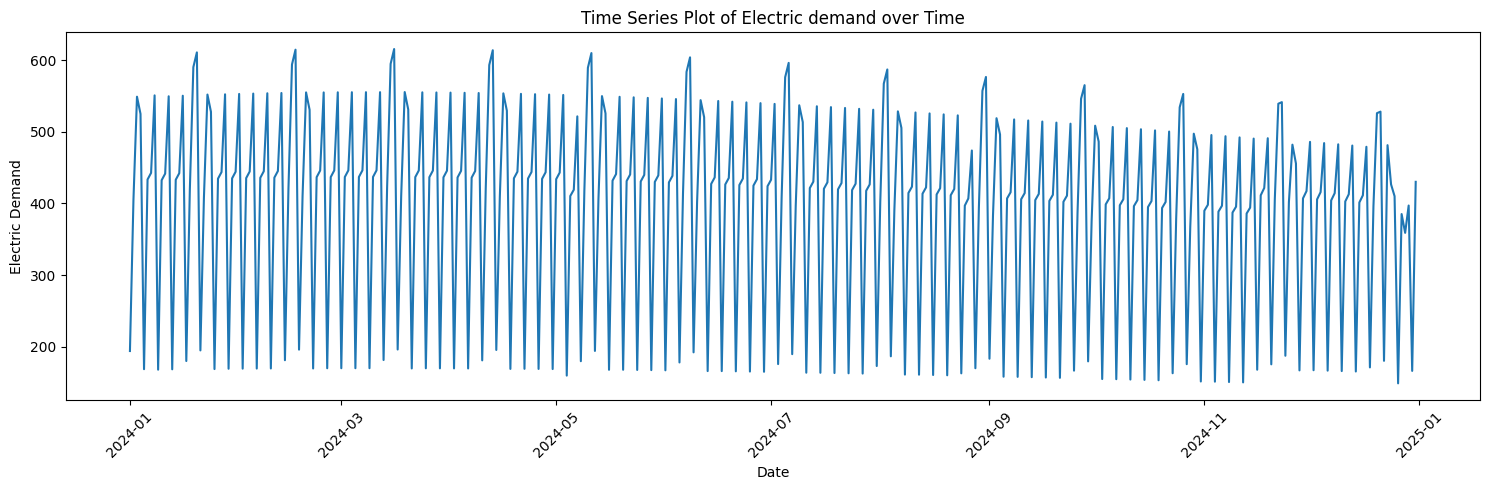

In [ ]:
# plot time series plot of CURRENT

plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='date', y='Demand', estimator='mean', errorbar=None) # Using mean to aggregate if needed

plt.title('Time Series Plot of Electric demand over Time')
plt.xlabel('Date')
plt.ylabel('Electric Demand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

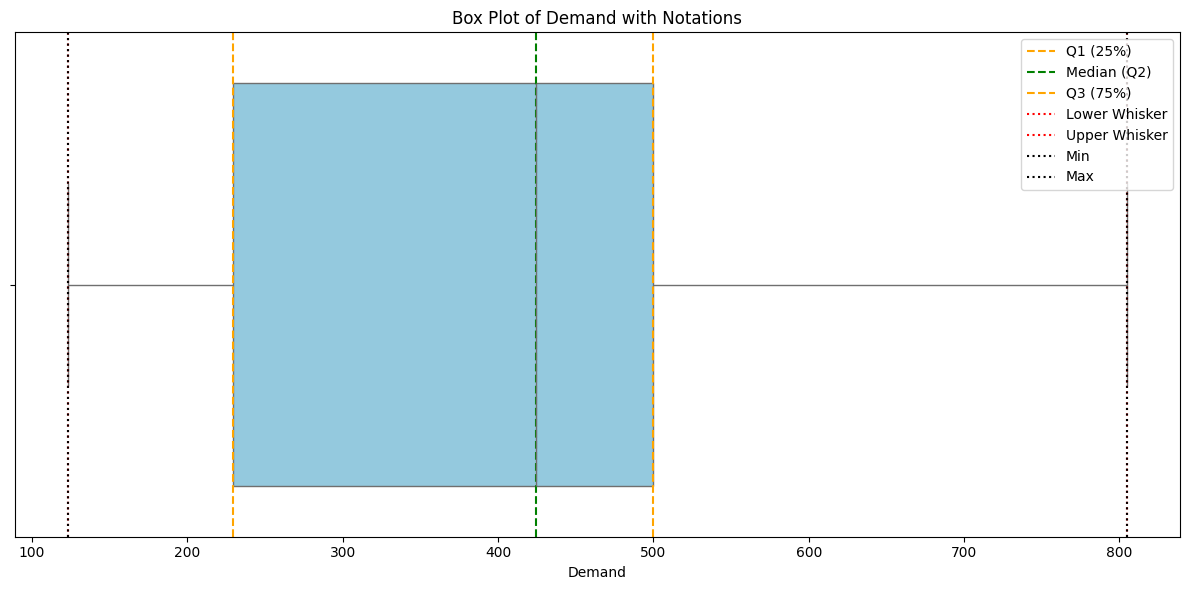

Q1 (25%): 229.54
Median (Q2): 424.70
Q3 (75%): 500.01
IQR: 270.47
Lower Whisker: 123.06
Upper Whisker: 804.87
Min: 123.06
Max: 804.87
Number of Outliers: 0


In [ ]:
# Calculate summary statistics
q1 = df['Demand'].quantile(0.25)
q2 = df['Demand'].quantile(0.50)
q3 = df['Demand'].quantile(0.75)
iqr = q3 - q1

lower_whisker = max(df['Demand'].min(), q1 - 1.5 * iqr)
upper_whisker = min(df['Demand'].max(), q3 + 1.5 * iqr)

outliers = df[(df['Demand'] < lower_whisker) | (df['Demand'] > upper_whisker)]

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Demand'], color='skyblue')

# Annotate statistics
plt.axvline(q1, color='orange', linestyle='--', label='Q1 (25%)')
plt.axvline(q2, color='green', linestyle='--', label='Median (Q2)')
plt.axvline(q3, color='orange', linestyle='--', label='Q3 (75%)')
plt.axvline(lower_whisker, color='red', linestyle=':', label='Lower Whisker')
plt.axvline(upper_whisker, color='red', linestyle=':', label='Upper Whisker')
plt.axvline(df['Demand'].min(), color='black', linestyle=':', label='Min')
plt.axvline(df['Demand'].max(), color='black', linestyle=':', label='Max')

# Title and labels
plt.title('Box Plot of Demand with Notations')
plt.xlabel('Demand')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Print statistics
print(f"Q1 (25%): {q1:.2f}")
print(f"Median (Q2): {q2:.2f}")
print(f"Q3 (75%): {q3:.2f}")
print(f"IQR: {iqr:.2f}")
print(f"Lower Whisker: {lower_whisker:.2f}")
print(f"Upper Whisker: {upper_whisker:.2f}")
print(f"Min: {df['Demand'].min():.2f}")
print(f"Max: {df['Demand'].max():.2f}")
print(f"Number of Outliers: {len(outliers)}")


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Clean series
series = df['Demand'].replace([np.inf, -np.inf], np.nan).dropna()

# ADF Test
result = adfuller(series)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] <= 0.05:
    print("\nReject H0 → The data is stationary.")
else:
    print("\nFail to reject H0 → The data is NOT stationary.")


ADF Statistic: -18.413410
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567

Reject H0 → The data is stationary.


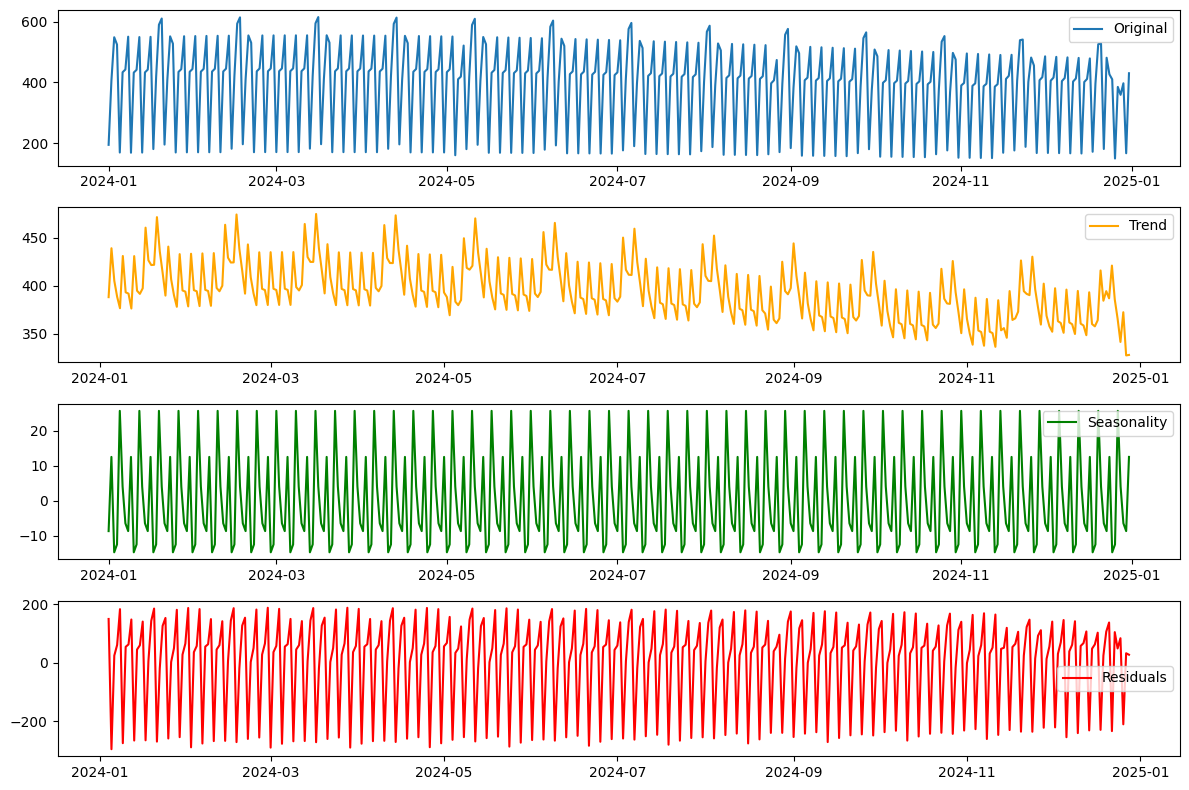

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as index
df_demand = df.set_index('date')[['Demand']]

# Resample to daily frequency (mean) and handle missing values
df_demand = df_demand.resample('D').mean().fillna(method='ffill')

# Decompose the Demand time series
decomposition = seasonal_decompose(df_demand['Demand'], model='additive')

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_demand['Demand'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Reindex components to match original df
trend = trend.reindex(df.index)
seasonal = seasonal.reindex(df.index)
residual = residual.reindex(df.index)

# Add components back to original dataframe
df['Demand_Trend'] = trend.values
df['Demand_Seasonal'] = seasonal.values
df['Demand_Residual'] = residual.values


# **Naive Forecast**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.dates as mdates

# === Load and Prepare Data ===
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df = df.sort_values('date')
demand_series = df.set_index('date')['Demand'].dropna()

# === 1. Split into Train, Validation, Test ===
train_size = int(0.6 * len(demand_series))
val_size = int(0.2 * len(demand_series))

train = demand_series[:train_size]
val = demand_series[train_size:train_size + val_size]
test = demand_series[train_size + val_size:]

# === 2. Naive Forecast (previous time step) ===
# Train
train_pred = train.shift(1).dropna()
train_true = train[1:]

# Validation
val_preds = val.shift(1).dropna()
val_true = val[1:]

# Test
test_preds = test.shift(1).dropna()
test_true = test[1:]

# === 3. Evaluation Metrics Function ===
def evaluate_forecast(true, pred, name):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    print(f"\n{name} Set Metrics:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    return true, pred

print("=== Naive Forecasting Evaluation ===")
y_train_true, y_train_pred = evaluate_forecast(train_true, train_pred, "Train")
y_val_true, y_val_pred = evaluate_forecast(val_true, val_preds, "Validation")
y_test_true, y_test_pred = evaluate_forecast(test_true, test_preds, "Test")

# === 4. Forecast Next 24 Hours ===
last_value = demand_series.iloc[-1]
future_dates = pd.date_range(start=demand_series.index[-1] + pd.Timedelta(hours=1), periods=24, freq='H')
future_preds = pd.Series([last_value] * 24, index=future_dates)

print("\n=== Naive Forecast for the Next 24 Hours ===")
for date, pred in zip(future_preds.index, future_preds.values):
    print(f"Date: {date}, Predicted Demand: {pred:.4f}")


=== Naive Forecasting Evaluation ===

Train Set Metrics:
MAE: 49.4822, MSE: 9092.7567, RMSE: 95.3559, R²: 0.7022

Validation Set Metrics:
MAE: 45.4711, MSE: 7818.9425, RMSE: 88.4248, R²: 0.6971

Test Set Metrics:
MAE: 43.1560, MSE: 6688.6546, RMSE: 81.7842, R²: 0.7074

=== Naive Forecast for the Next 24 Hours ===
Date: 2024-12-31 01:00:00, Predicted Demand: 488.3438
Date: 2024-12-31 02:00:00, Predicted Demand: 488.3438
Date: 2024-12-31 03:00:00, Predicted Demand: 488.3438
Date: 2024-12-31 04:00:00, Predicted Demand: 488.3438
Date: 2024-12-31 05:00:00, Predicted Demand: 488.3438
Date: 2024-12-31 06:00:00, Predicted Demand: 488.3438
Date: 2024-12-31 07:00:00, Predicted Demand: 488.3438
Date: 2024-12-31 08:00:00, Predicted Demand: 488.3438
Date: 2024-12-31 09:00:00, Predicted Demand: 488.3438
Date: 2024-12-31 10:00:00, Predicted Demand: 488.3438
Date: 2024-12-31 11:00:00, Predicted Demand: 488.3438
Date: 2024-12-31 12:00:00, Predicted Demand: 488.3438
Date: 2024-12-31 13:00:00, Predicted 

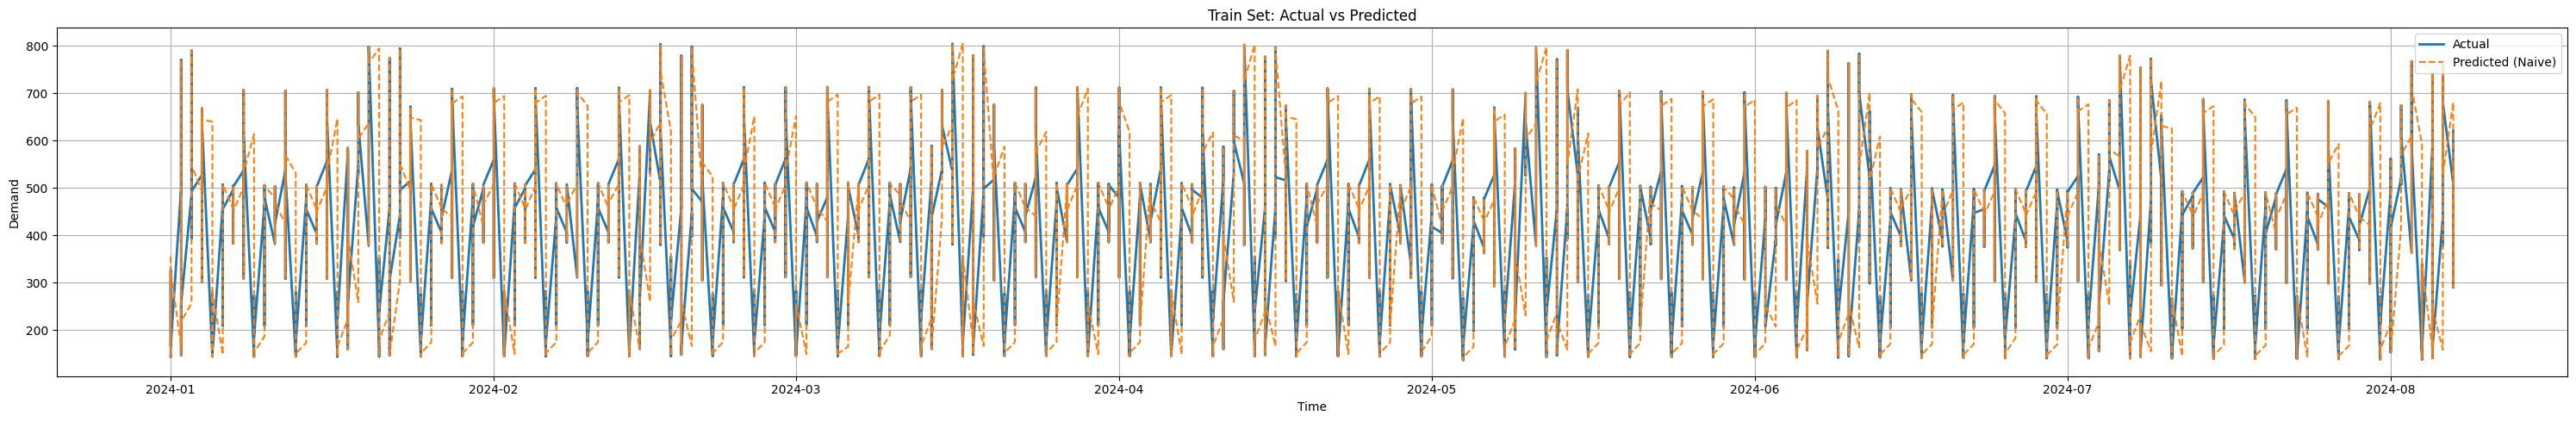

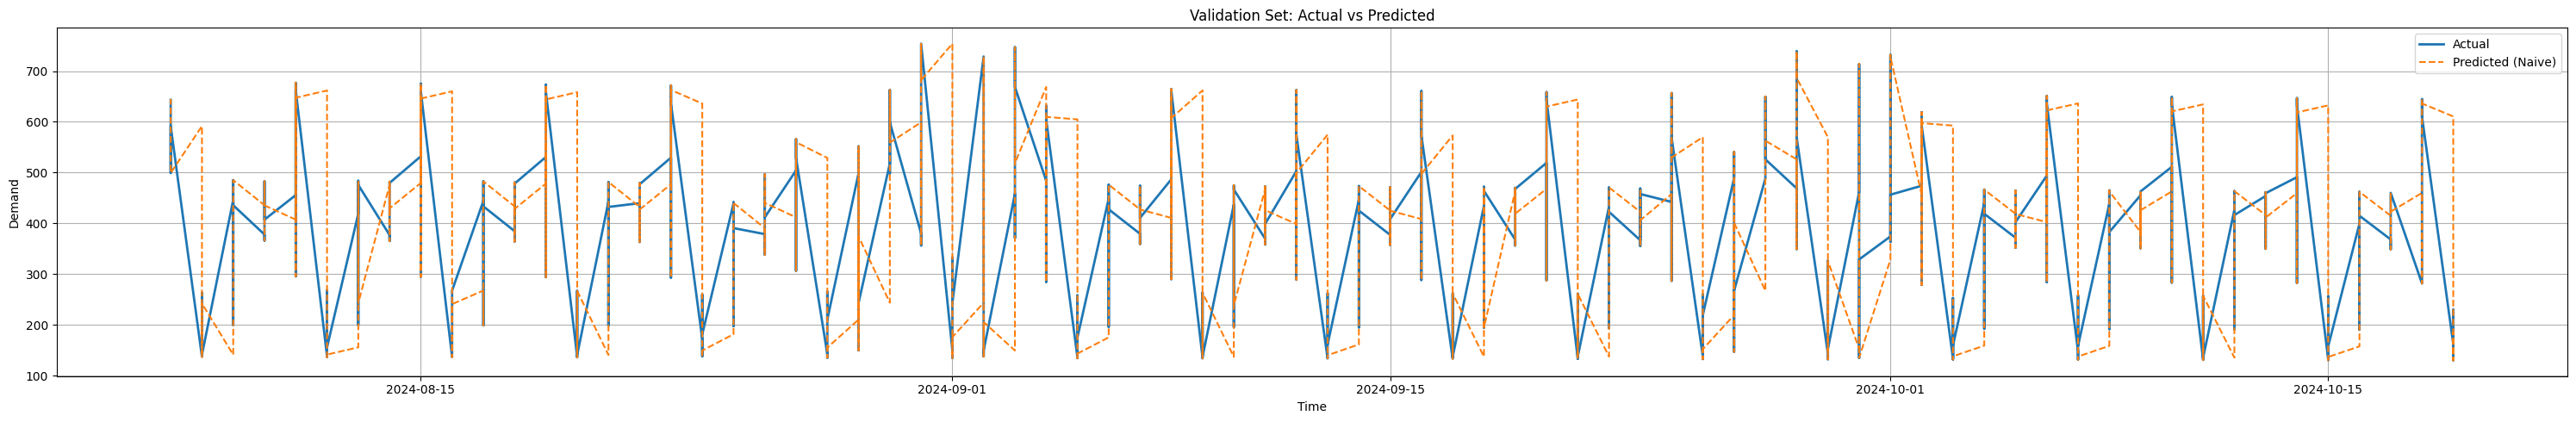

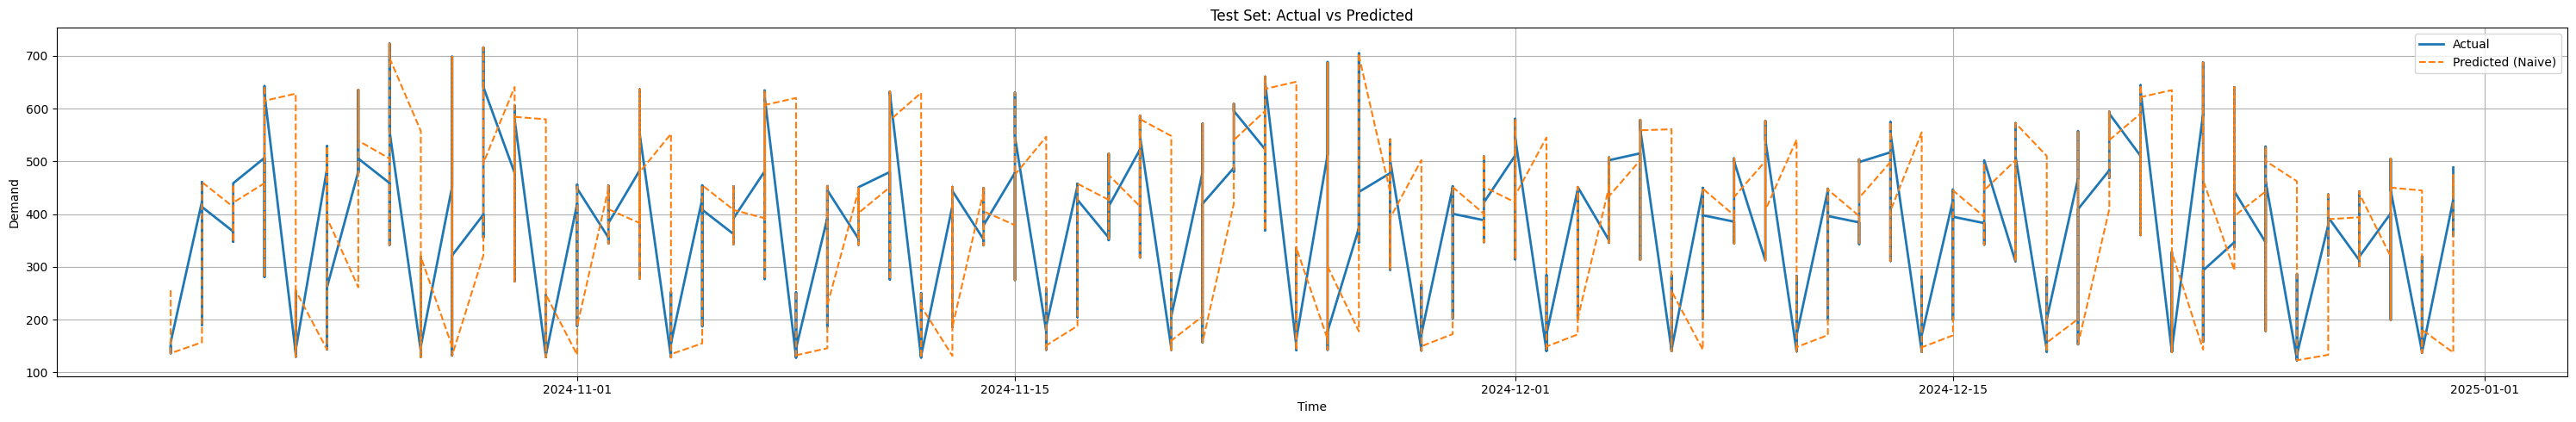

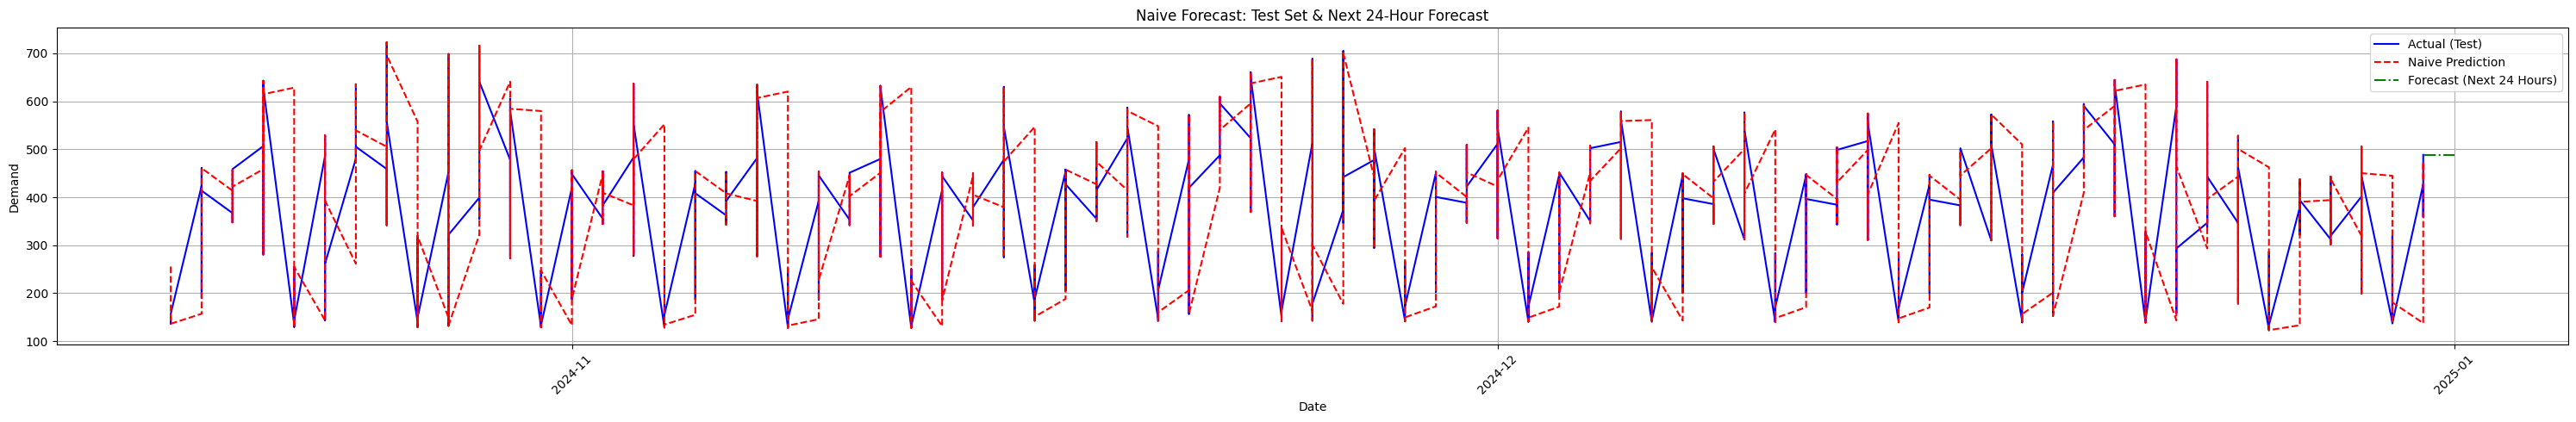

In [ ]:
# === 5. Plot Function ===
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(30, 5))
    plt.plot(y_true.index, y_true.values, label='Actual', linewidth=2)
    plt.plot(y_pred.index, y_pred.values, label='Predicted (Naive)', linestyle='--')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Demand')   # updated
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === 6. Actual vs Predicted Plots ===
plot_actual_vs_predicted(y_train_true, y_train_pred, "Train Set: Actual vs Predicted")
plot_actual_vs_predicted(y_val_true, y_val_pred, "Validation Set: Actual vs Predicted")
plot_actual_vs_predicted(y_test_true, y_test_pred, "Test Set: Actual vs Predicted")

# === 7. Forecast Plot ===
plt.figure(figsize=(30, 5))
plt.plot(y_test_true.index, y_test_true, label='Actual (Test)', color='blue')
plt.plot(y_test_pred.index, y_test_pred, label='Naive Prediction', linestyle='--', color='red')
plt.plot(future_preds.index, future_preds.values, label='Forecast (Next 24 Hours)', linestyle='-.', color='green')

plt.xlabel('Date')
plt.ylabel('Demand')    # updated
plt.title('Naive Forecast: Test Set & Next 24-Hour Forecast')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


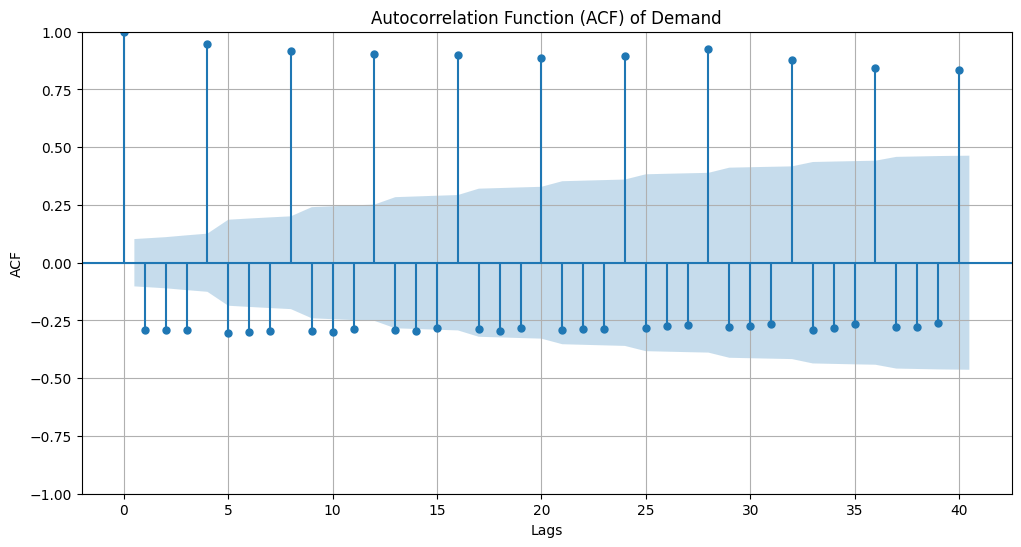

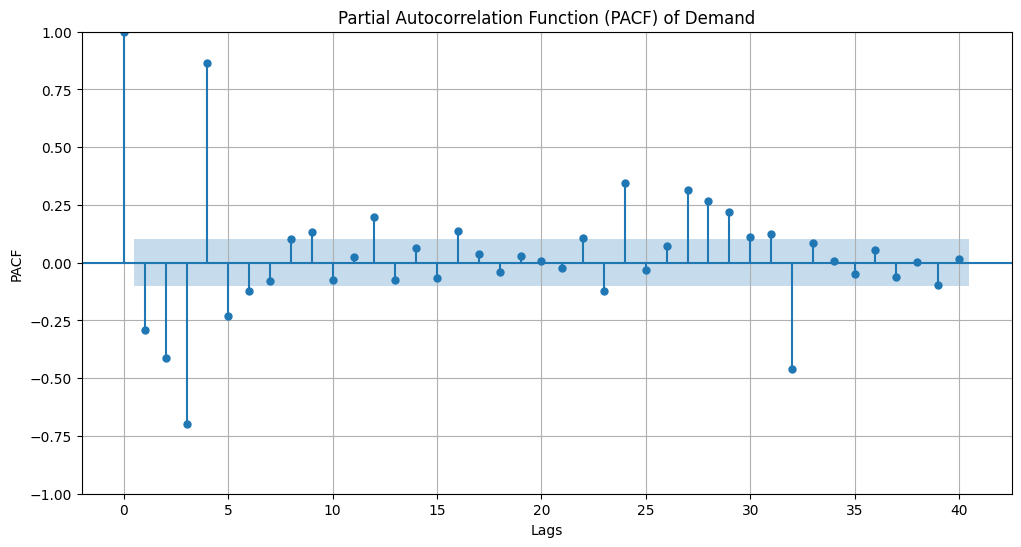

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df_demand['Demand'].dropna(), lags=40, ax=plt.gca())  # Drop NaNs if any
plt.title('Autocorrelation Function (ACF) of Demand')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df_demand['Demand'].dropna(), lags=40, ax=plt.gca())  # Drop NaNs if any
plt.title('Partial Autocorrelation Function (PACF) of Demand')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.grid(True)
plt.show()


Conclusion: Since the ACF does not suggest a clear cut-off (ruling out MA), and PACF shows significance at lag 1 only, we choose to apply an AR(1) model for forecasting the electric load.

**# AR(1)**

In [ ]:
df.head()

date  hour      Demand  Year Day Name  Day  Month  Day_Encoded  \
0  2024-01-01     0  355.341456  2024   Monday    1      1            1   
23 2024-01-01    23  144.374160  2024   Monday    1      1            1   
22 2024-01-01    22  143.254980  2024   Monday    1      1            1   
21 2024-01-01    21  142.881912  2024   Monday    1      1            1   
20 2024-01-01    20  142.881912  2024   Monday    1      1            1   

    Demand_Trend  Demand_Seasonal  Demand_Residual  
0            NaN              NaN              NaN  
23           NaN              NaN              NaN  
22           NaN              NaN              NaN  
21           NaN              NaN              NaN  
20           NaN              NaN              NaN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.dates as mdates

# === 0. Create datetime from date + hour ===
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = df['date'] + pd.to_timedelta(df['hour'], unit='h')

# Sort & set as time series index
df = df.sort_values('datetime')
df = df.set_index('datetime').asfreq('H')

# Demand series
demand_series = df['Demand'].dropna()


# === 1. Train/Val/Test Split ===
train_size = int(0.6 * len(demand_series))
val_size = int(0.2 * len(demand_series))

train = demand_series[:train_size]
val = demand_series[train_size:train_size + val_size]
test = demand_series[train_size + val_size:]


# === 2. Fit AR(1) on Train Set ===
model_train = ARIMA(train, order=(1, 0, 0)).fit()
train_pred = model_train.fittedvalues
train_true = train[train_pred.index]


# === 3. Rolling Forecast on Validation Set ===
val_preds = []
current_train = train.copy()

for timestamp in val.index:
    model = ARIMA(current_train, order=(1, 0, 0)).fit()
    pred = model.forecast(steps=1).iloc[0]
    val_preds.append(pred)
    current_train.loc[timestamp] = val.loc[timestamp]

val_preds = pd.Series(val_preds, index=val.index)


# === 4. Rolling Forecast on Test Set ===
test_preds = []
current_train = pd.concat([train, val])

for timestamp in test.index:
    model = ARIMA(current_train, order=(1, 0, 0)).fit()
    pred = model.forecast(steps=1).iloc[0]
    test_preds.append(pred)
    current_train.loc[timestamp] = test.loc[timestamp]

test_preds = pd.Series(test_preds, index=test.index)


# === 5. Evaluation Metrics ===
def metrics(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = metrics(train_true, train_pred)
mae_val, mse_val, rmse_val, r2_val = metrics(val, val_preds)
mae_test, mse_test, rmse_test, r2_test = metrics(test, test_preds)

print("=== AR(1) Model Evaluation for Demand ===")
print(f"Train →  MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}")
print(f"Val   →  MAE: {mae_val:.4f}, RMSE: {rmse_val:.4f}, R²: {r2_val:.4f}")
print(f"Test  →  MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")


# === 6. 24-Hour Forecast ===
last_index = demand_series.index[-1]
future_dates = pd.date_range(start=last_index + pd.Timedelta(hours=1), periods=24, freq='H')

future_preds = []
current_data = pd.concat([train, val, test])

for ts in future_dates:
    model = ARIMA(current_data, order=(1, 0, 0)).fit()
    pred = model.forecast(steps=1).iloc[0]
    future_preds.append(pred)
    current_data.loc[ts] = pred

future_preds = pd.Series(future_preds, index=future_dates)


# === 7. Print Forecast ===
print("\n=== AR(1) Forecast for Next 24 Hours ===")
for dt, pred in future_preds.items():
    print(f"{dt} → {pred:.4f}")


=== AR(1) Model Evaluation for Demand ===
Train →  MAE: 16.4393, RMSE: 21.0423, R²: 0.9855
Val   →  MAE: 15.1612, RMSE: 19.4485, R²: 0.9852
Test  →  MAE: 14.0015, RMSE: 17.9624, R²: 0.9859

=== AR(1) Forecast for Next 24 Hours ===
2025-01-01 00:00:00 → 487.6564
2025-01-01 01:00:00 → 486.9741
2025-01-01 02:00:00 → 486.2968
2025-01-01 03:00:00 → 485.6245
2025-01-01 04:00:00 → 484.9572
2025-01-01 05:00:00 → 484.2949
2025-01-01 06:00:00 → 483.6374
2025-01-01 07:00:00 → 482.9848
2025-01-01 08:00:00 → 482.3370
2025-01-01 09:00:00 → 481.6941
2025-01-01 10:00:00 → 481.0558
2025-01-01 11:00:00 → 480.4223
2025-01-01 12:00:00 → 479.7935
2025-01-01 13:00:00 → 479.1693
2025-01-01 14:00:00 → 478.5498
2025-01-01 15:00:00 → 477.9348
2025-01-01 16:00:00 → 477.3244
2025-01-01 17:00:00 → 476.7185
2025-01-01 18:00:00 → 476.1171
2025-01-01 19:00:00 → 475.5201
2025-01-01 20:00:00 → 474.9275
2025-01-01 21:00:00 → 474.3393
2025-01-01 22:00:00 → 473.7555
2025-01-01 23:00:00 → 473.1760


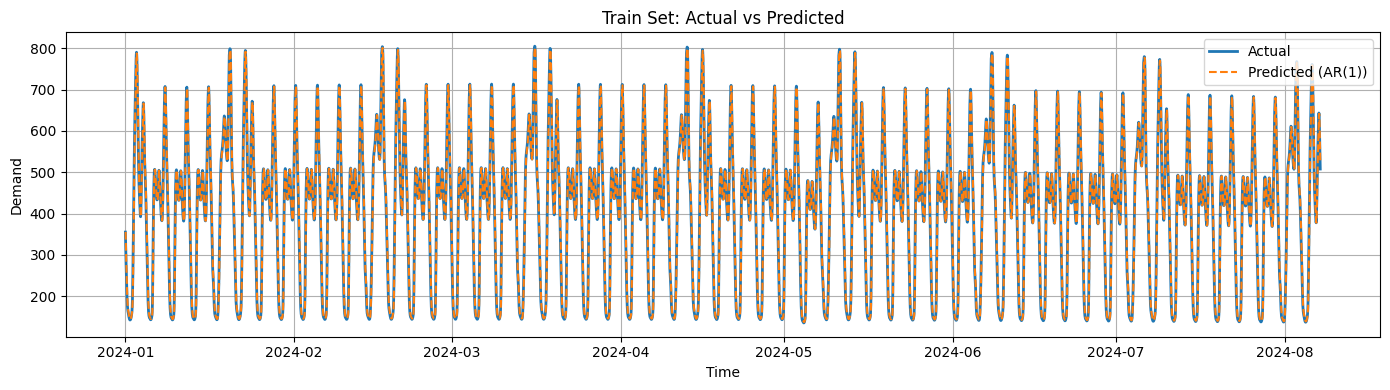

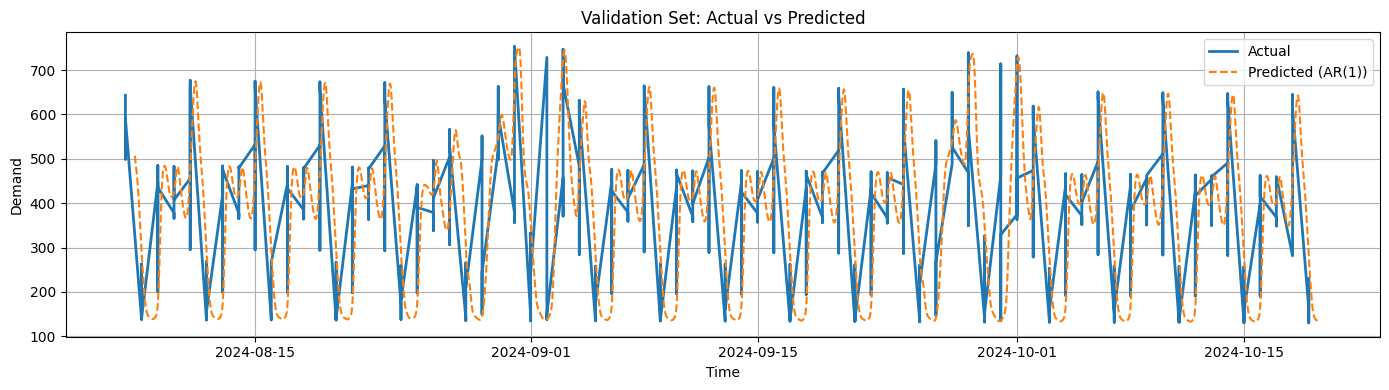

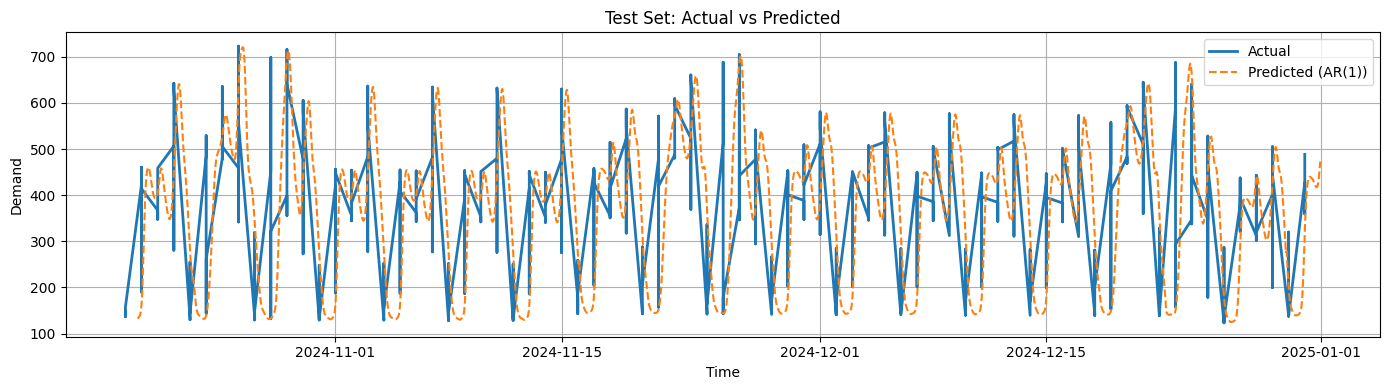

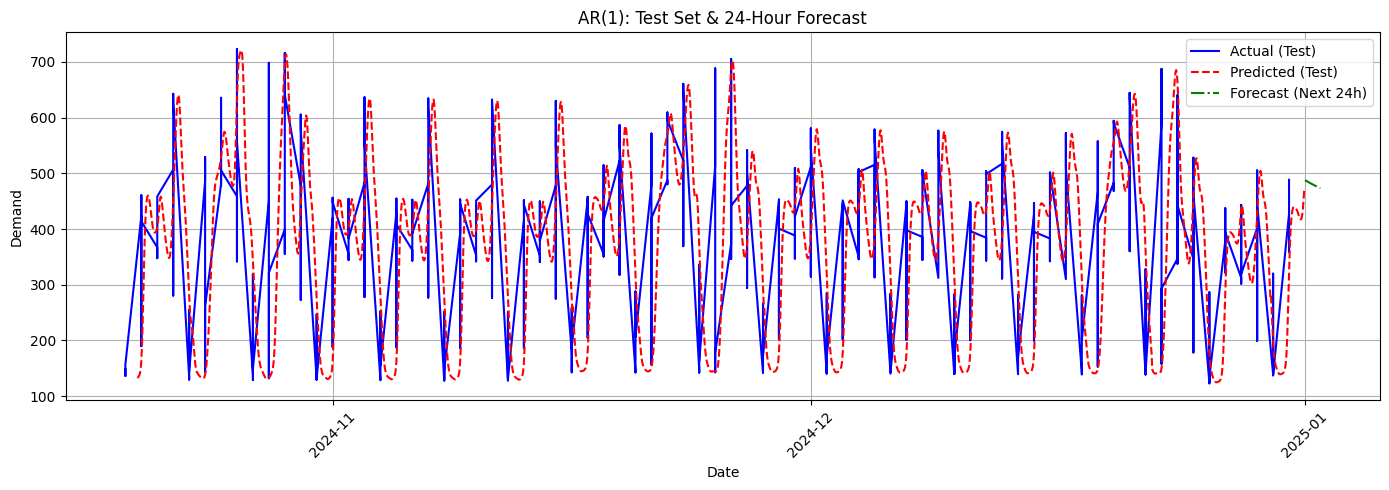

In [ ]:
# === 8. Plot Actual vs Predicted ===
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(14, 4))
    plt.plot(y_true.index, y_true.values, label='Actual', linewidth=2)
    plt.plot(y_pred.index, y_pred.values, label='Predicted (AR(1))', linestyle='--')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Demand')   # UPDATED HERE
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(train_true, train_pred[1:], "Train Set: Actual vs Predicted")
plot_actual_vs_predicted(val_true, val_preds, "Validation Set: Actual vs Predicted")
plot_actual_vs_predicted(test_true, test_preds, "Test Set: Actual vs Predicted")


# === 9. Forecast Plot for Test + Future ===
plt.figure(figsize=(14, 5))
plt.plot(test_true.index, test_true.values, label='Actual (Test)', color='blue')
plt.plot(test_preds.index, test_preds.values, label='Predicted (Test)', linestyle='--', color='red')
plt.plot(future_preds.index, future_preds.values, label='Forecast (Next 24h)', linestyle='-.', color='green')

plt.xlabel('Date')
plt.ylabel('Demand')    # UPDATED HERE
plt.title('AR(1): Test Set & 24-Hour Forecast')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# **Rnn Final**

In [ ]:
df.head()

date  hour      Demand  Year Day Name  Day  Month  Day_Encoded  \
0 2024-01-01     0  355.341456  2024   Monday    1      1            1   
1 2024-01-01     1  326.427360  2024   Monday    1      1            1   
2 2024-01-01     2  302.551524  2024   Monday    1      1            1   
3 2024-01-01     3  279.794880  2024   Monday    1      1            1   
4 2024-01-01     4  257.784348  2024   Monday    1      1            1   

   Demand_Trend  Demand_Seasonal  Demand_Residual  
0           NaN              NaN              NaN  
1           NaN              NaN              NaN  
2           NaN              NaN              NaN  
3           NaN              NaN              NaN  
4           NaN              NaN              NaN

In [ ]:
df.isna().sum()

date                  0
hour                  0
Demand                0
Year                  0
Day Name              0
Day                   0
Month                 0
Day_Encoded           0
Demand_Trend       8784
Demand_Seasonal    8784
Demand_Residual    8784
dtype: int64

Trial 6 Complete [00h 01m 39s]
val_loss: 0.021605797111988068

Best val_loss So Far: 0.003096554661169648
Total elapsed time: 00h 10m 15s

Best hyperparameters found: {'units1': 192, 'l2_reg': 0.005, 'dropout1': 0.2, 'units2': 128, 'dropout2': 0.4, 'lr': 0.001}
Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 1.3734 - val_loss: 0.6649
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.6435 - val_loss: 0.4347
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.3992 - val_loss: 0.2643
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.2410 - val_loss: 0.1610
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.1455 - val_loss: 0.0971
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0897 - val_loss: 0.0630
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0580 - val_loss: 0.0408
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0395 - val_loss: 0.0285
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss:

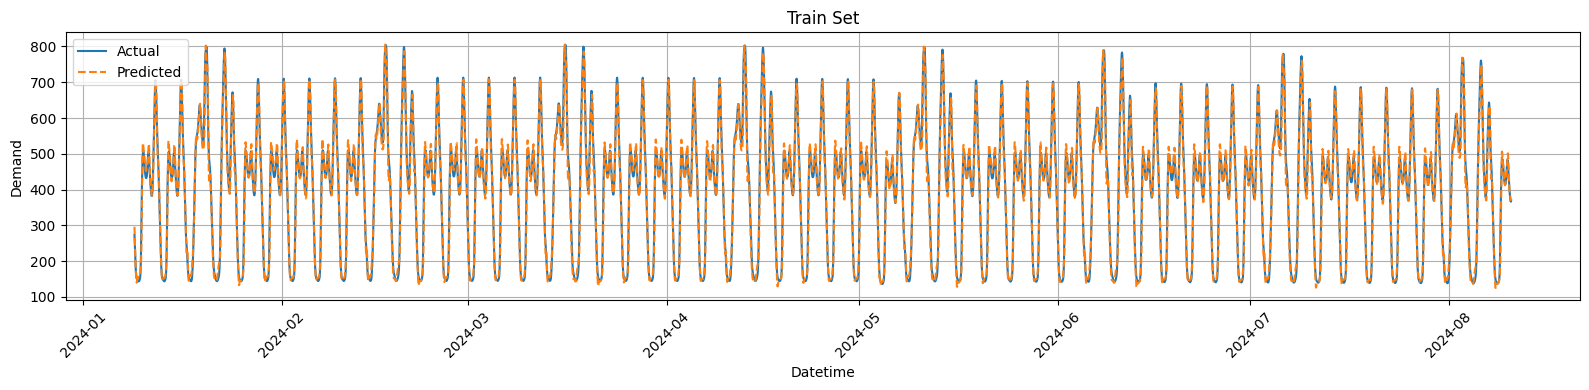

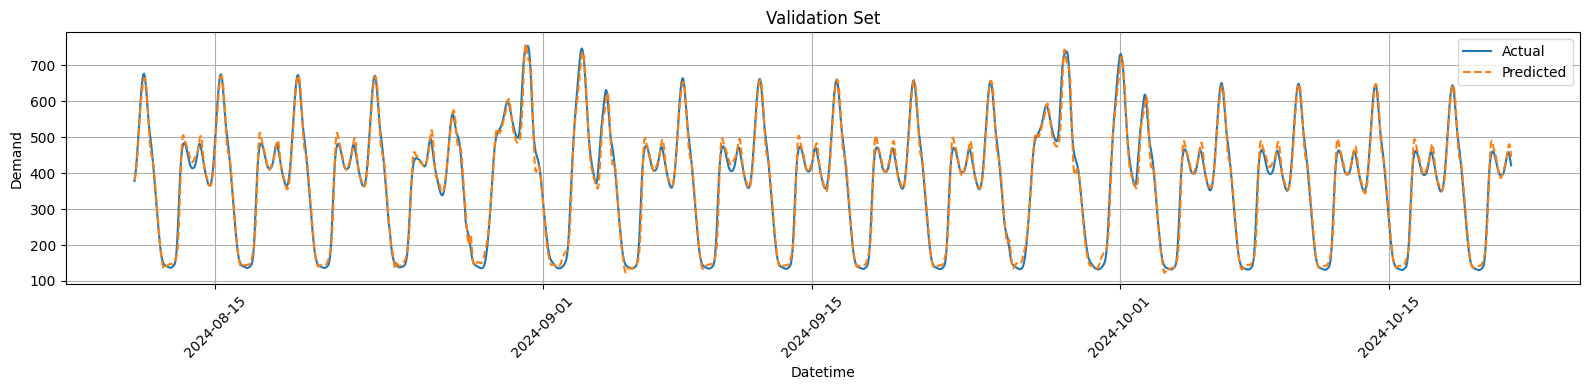

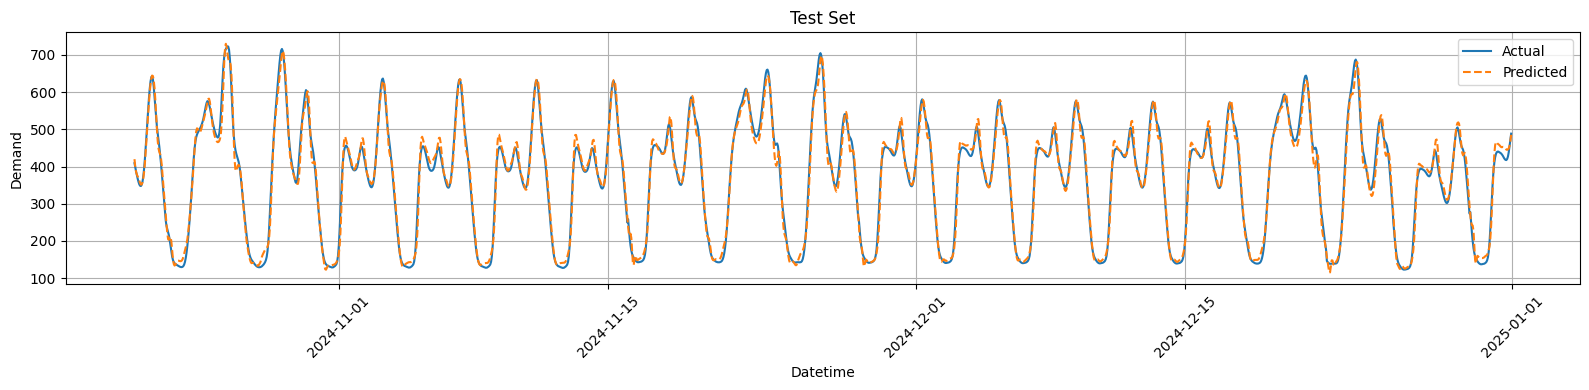


24-Hour Forecast:
2025-01-01 00:00:00 -> 485.19
2025-01-01 01:00:00 -> 503.31
2025-01-01 02:00:00 -> 513.43
2025-01-01 03:00:00 -> 511.85
2025-01-01 04:00:00 -> 505.08
2025-01-01 05:00:00 -> 497.83
2025-01-01 06:00:00 -> 487.07
2025-01-01 07:00:00 -> 471.94
2025-01-01 08:00:00 -> 458.31
2025-01-01 09:00:00 -> 448.57
2025-01-01 10:00:00 -> 438.35
2025-01-01 11:00:00 -> 427.09
2025-01-01 12:00:00 -> 419.52
2025-01-01 13:00:00 -> 416.07
2025-01-01 14:00:00 -> 413.39
2025-01-01 15:00:00 -> 412.85
2025-01-01 16:00:00 -> 418.42
2025-01-01 17:00:00 -> 428.37
2025-01-01 18:00:00 -> 438.58
2025-01-01 19:00:00 -> 449.62
2025-01-01 20:00:00 -> 462.29
2025-01-01 21:00:00 -> 472.20
2025-01-01 22:00:00 -> 476.38
2025-01-01 23:00:00 -> 477.96


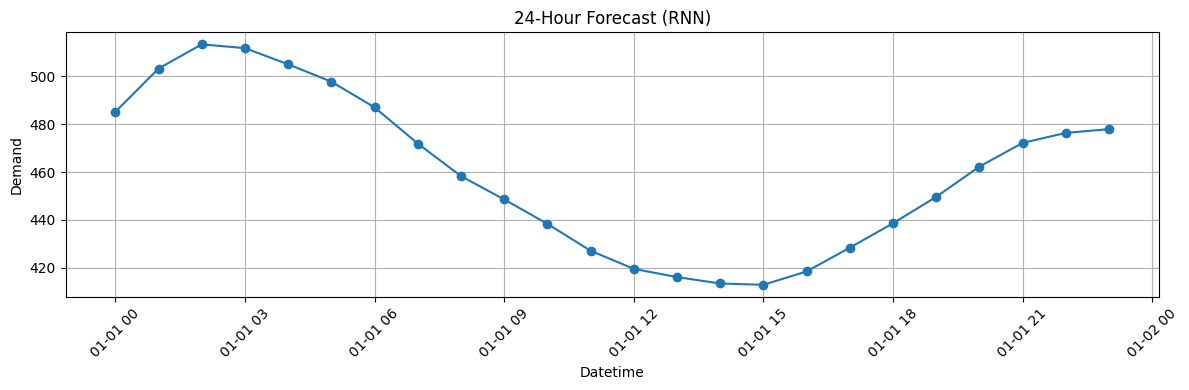


Model saved to 'rnn_demand_model.h5'


In [ ]:
# FULL UPDATED RNN PIPELINE (NaN-safe) — SimpleRNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Robust KerasTuner import (try both package names)
try:
    from keras_tuner.tuners import RandomSearch
except Exception:
    try:
        from kerastuner.tuners import RandomSearch
    except Exception as e:
        raise ImportError("Install keras-tuner (pip install keras-tuner) or kerastuner") from e

# ---------------------------
# ASSUMPTION: df is preloaded in memory and contains at least:
#    'date' (date), 'hour' (0..23), 'Demand' (target)
# ---------------------------

# ---------- 0) SAFE DATETIME CREATION ----------
# Ensure required columns exist
for col in ['date', 'hour', 'Demand']:
    if col not in df.columns:
        raise KeyError(f"DataFrame must contain '{col}' column.")

# Force types
df['date'] = pd.to_datetime(df['date'], errors='coerce')           # convert or NaT
df['hour'] = df['hour'].astype(str).str.extract(r'(\d{1,2})')[0]   # extract digits
df['hour'] = pd.to_numeric(df['hour'], errors='coerce').astype('Int64')

# If index named 'Datetime' -> reset it to avoid duplicate column creation
if df.index.name == 'Datetime':
    df = df.reset_index()

# If there exists a 'Datetime' column, drop it (we will create a clean one)
if 'Datetime' in df.columns:
    df = df.drop(columns=['Datetime'])

# Build unified Datetime and set as hourly index
df['Datetime'] = df['date'] + pd.to_timedelta(df['hour'].astype(int), unit='h')
df = df.sort_values('Datetime').set_index('Datetime')
df = df.asfreq('H')   # make hourly timeline (may introduce NaNs)

# ---------- 1) DROP UNWANTED DECOMPOSITION COLUMNS ----------
for col in ['Demand_Trend', 'Demand_Seasonal', 'Demand_Residual']:
    if col in df.columns:
        df = df.drop(columns=[col])

# ---------- 2) FEATURE ENGINEERING (lags + rolling means) ----------
target_col = 'Demand'

# create lags and rolling means (they will introduce NaNs at start)
df['lag_1'] = df[target_col].shift(1)
df['lag_24'] = df[target_col].shift(24)
df['lag_168'] = df[target_col].shift(168)

df['rolling_mean_24'] = df[target_col].rolling(window=24, min_periods=1).mean()
df['rolling_mean_168'] = df[target_col].rolling(window=168, min_periods=1).mean()

# ---------- 2.b) candidate features (do NOT include decomposition columns) ----------
candidate_features = [
    'Demand',
    'Year', 'Month', 'Day_Encoded',     # time features if present
    'lag_1', 'lag_24', 'lag_168',
    'rolling_mean_24', 'rolling_mean_168'
]

# Keep only columns that actually exist
features = [c for c in candidate_features if c in df.columns]

if target_col not in features:
    # target should always be used; raise early if something odd
    raise KeyError(f"Target '{target_col}' not found in DataFrame columns.")

print("Using features:", features)

# ---------- 3) CLEAN NaN / Inf (safe, in-place) ----------
# Replace inf with NaN across entire DF
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows missing any required data (features + target). This is the safest approach.
required_cols = features + [target_col]
before_rows = len(df)
df = df.dropna(subset=required_cols)
after_rows = len(df)
print(f"Dropped {before_rows - after_rows} rows due to NaN/Inf in required columns.")

# Optional: quick sanity checks
print("Final row count:", len(df))
print("Any NaN in features?:", df[features].isna().any().any())
print("Any Inf in features?:", np.isinf(df[features].values).any())
print("Any NaN in target?:", df[target_col].isna().any())

# ---------- 4) PREPARE X and y ----------
X = df[features].values
y = df[target_col].values

# ---------- 5) CREATE SEQUENCES ----------
def create_sequences(X, y, time_steps=24):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 24
X_seq, y_seq = create_sequences(X, y, time_steps=time_steps)

if len(X_seq) == 0:
    raise ValueError("No sequences created — dataset too small after cleaning. Check df length and time_steps.")

# ---------- 6) Train / Val / Test split ----------
n_samples = len(X_seq)
train_size = int(n_samples * 0.6)
val_size = int(n_samples * 0.2)

X_train, y_train = X_seq[:train_size], y_seq[:train_size]
X_val, y_val = X_seq[train_size:train_size + val_size], y_seq[train_size:train_size + val_size]
X_test, y_test = X_seq[train_size + val_size:], y_seq[train_size + val_size:]

print("Sequence shapes => X_train, X_val, X_test:", X_train.shape, X_val.shape, X_test.shape)

# ---------- 7) SCALE FEATURES & TARGET (fit on train only) ----------
n_features = X_train.shape[-1]
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Flatten-time for scaler, then reshape back
X_train_2d = X_train.reshape(-1, n_features)
X_val_2d = X_val.reshape(-1, n_features)
X_test_2d = X_test.reshape(-1, n_features)

X_train_scaled_2d = scaler_X.fit_transform(X_train_2d)
X_val_scaled_2d = scaler_X.transform(X_val_2d)
X_test_scaled_2d = scaler_X.transform(X_test_2d)

X_train_scaled = X_train_scaled_2d.reshape(X_train.shape)
X_val_scaled = X_val_scaled_2d.reshape(X_val.shape)
X_test_scaled = X_test_scaled_2d.reshape(X_test.shape)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).ravel()
y_val_scaled = scaler_y.transform(y_val.reshape(-1,1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1)).ravel()

# final safety checks (before training)
import sys
if np.isnan(X_train_scaled).any() or np.isnan(y_train_scaled).any():
    print("ERROR: NaN found in training data after scaling. Aborting.")
    print("NaNs in X_train_scaled:", np.isnan(X_train_scaled).sum())
    print("NaNs in y_train_scaled:", np.isnan(y_train_scaled).sum())
    sys.exit(1)

# ---------- 8) Build tuner + model (with gradient clipping) ----------
def build_model(hp):
    model = Sequential()
    model.add(SimpleRNN(
        units=hp.Int('units1', 64, 256, step=64),
        return_sequences=True,
        kernel_regularizer=l2(hp.Choice('l2_reg', [0.001, 0.005])),
        input_shape=(time_steps, n_features)
    ))
    model.add(Dropout(hp.Choice('dropout1', [0.2, 0.3, 0.4])))

    model.add(SimpleRNN(
        units=hp.Int('units2', 32, 128, step=32),
        kernel_regularizer=l2(hp.Choice('l2_reg', [0.001, 0.005])),
    ))
    model.add(Dropout(hp.Choice('dropout2', [0.2, 0.3, 0.4])))

    model.add(Dense(1))

    # use clipnorm to prevent exploding gradients
    opt = Adam(learning_rate=hp.Choice('lr', [1e-3, 5e-4, 1e-4]), clipnorm=1.0)
    model.compile(optimizer=opt, loss='mse')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=6,
    executions_per_trial=1,
    directory='rnn_tuning_dir',
    project_name='rnn_electricity'
)

# Run tuner search (short epochs while debugging)
tuner.search(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=20,
    batch_size=64,
    callbacks=[EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)],
    verbose=1
)

best_hp = tuner.get_best_hyperparameters(1)[0]
print("\nBest hyperparameters found:", best_hp.values)

model = tuner.hypermodel.build(best_hp)

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=50,
    batch_size=64,
    callbacks=[EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)],
    verbose=1
)

# ---------- 9) Evaluation helper ----------
def evaluate_model(model, Xs, ys, label):
    y_pred_scaled = model.predict(Xs, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(ys.reshape(-1, 1))

    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{label} Set Metrics:")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²:  {r2:.4f}")

    return y_pred.ravel(), y_true.ravel()

y_train_pred, y_train_true = evaluate_model(model, X_train_scaled, y_train_scaled, "Train")
y_val_pred, y_val_true = evaluate_model(model, X_val_scaled, y_val_scaled, "Validation")
y_test_pred, y_test_true = evaluate_model(model, X_test_scaled, y_test_scaled, "Test")

# ---------- 10) Align dates for plotting ----------
dates_all = df.index[time_steps: time_steps + len(X_seq)]
train_dates = dates_all[:train_size]
val_dates = dates_all[train_size:train_size + val_size]
test_dates = dates_all[train_size + val_size:]

# Plot helper
def plot_actual_vs_predicted(dates, actual, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(dates, actual, label='Actual')
    plt.plot(dates, predicted, label='Predicted', linestyle='--')
    plt.title(title)
    plt.xlabel('Datetime')
    plt.ylabel('Demand')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(train_dates, y_train_true, y_train_pred, "Train Set")
plot_actual_vs_predicted(val_dates, y_val_true, y_val_pred, "Validation Set")
plot_actual_vs_predicted(test_dates, y_test_true, y_test_pred, "Test Set")

# ---------- 11) Fixed iterative 24-hour forecast (update only Demand feature) ----------
forecast_unscaled = []

last_seq = X_seq[-1]   # raw last sequence
last_seq_scaled = scaler_X.transform(last_seq).reshape(1, time_steps, n_features)

current = last_seq_scaled.copy()
demand_idx = features.index('Demand')

for i in range(24):
    pred_scaled = model.predict(current, verbose=0)[0,0]
    pred_unscaled = scaler_y.inverse_transform([[pred_scaled]])[0,0]
    forecast_unscaled.append(pred_unscaled)

    # update only the Demand value in the next step
    next_step = current[0, -1, :].copy()
    next_step[demand_idx] = pred_scaled

    current = np.roll(current, -1, axis=1)
    current[0, -1, :] = next_step

start_dt = df.index[-1] + timedelta(hours=1)
forecast_dates = [start_dt + timedelta(hours=i) for i in range(24)]

print("\n24-Hour Forecast:")
for d, v in zip(forecast_dates, forecast_unscaled):
    print(f"{d} -> {v:.2f}")

plt.figure(figsize=(12,4))
plt.plot(forecast_dates, forecast_unscaled, marker='o')
plt.title("24-Hour Forecast (RNN)")
plt.xlabel('Datetime')
plt.ylabel('Demand')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- 12) Save model ----------
model.save('rnn_demand_model.h5')
print("\nModel saved to 'rnn_demand_model.h5'")


# **LSTM final**

In [ ]:
pip install keras-tuner --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 2.3 MB/s eta 0:00:00


Using features: ['Demand', 'Year', 'Month', 'Day', 'Day_Encoded', 'lag_1', 'lag_24', 'lag_168', 'rolling_mean_24', 'rolling_mean_168']
Reloading Tuner from bilstm_tuner/demand_bilstm/tuner0.json

 BEST HYPERPARAMETERS FOUND 
units1
l2_reg
dropout1
units2
dropout2
lr
Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - loss: 0.3553 - val_loss: 0.2046
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.1895 - val_loss: 0.1334
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.1256 - val_loss: 0.0935
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.0884 - val_loss: 0.0679
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - loss: 0.0662 - val_loss: 0.0531
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - loss: 0.0526 - val_loss: 0.0427
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0437 - val_loss: 0.0357
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0368 - val_loss: 0.0317
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/ste

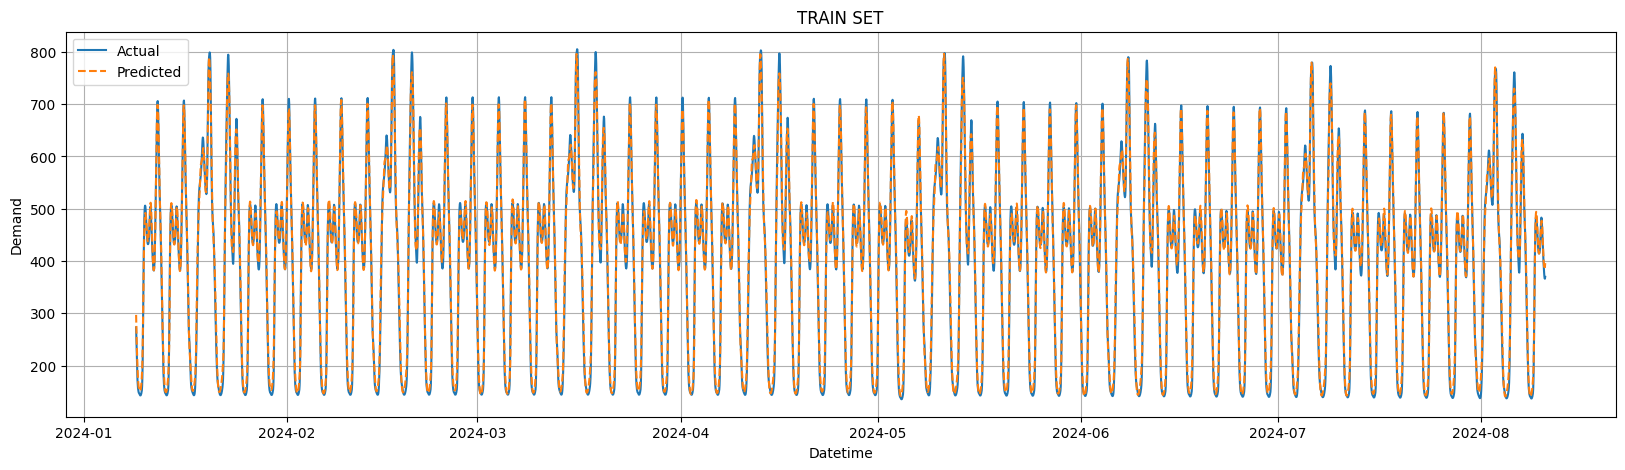

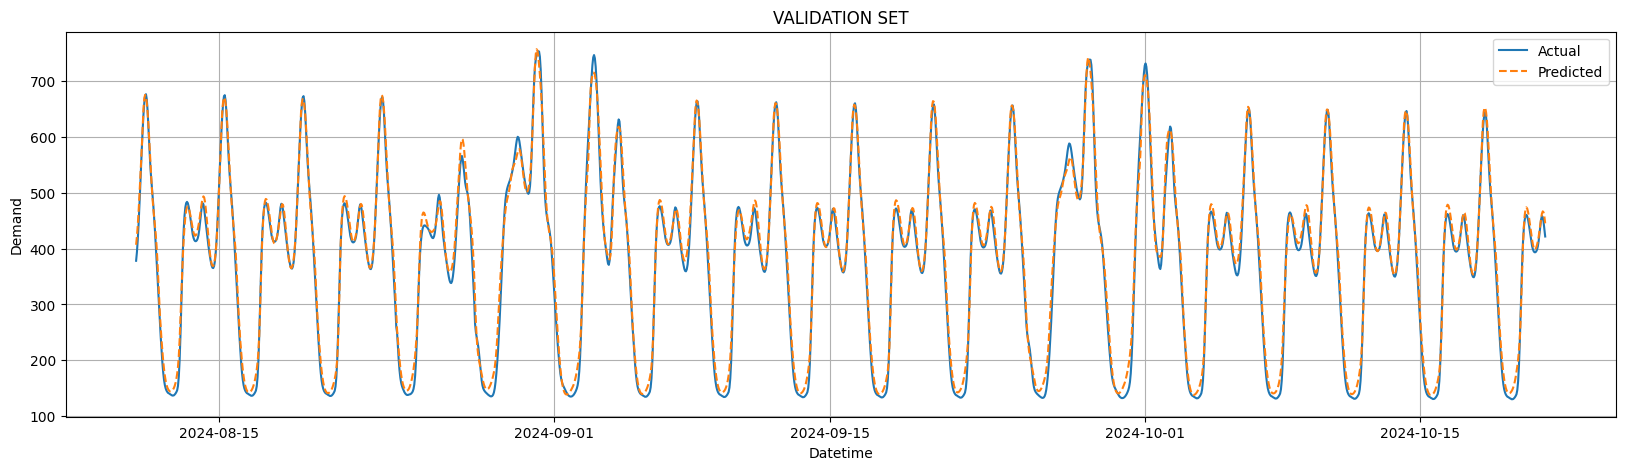

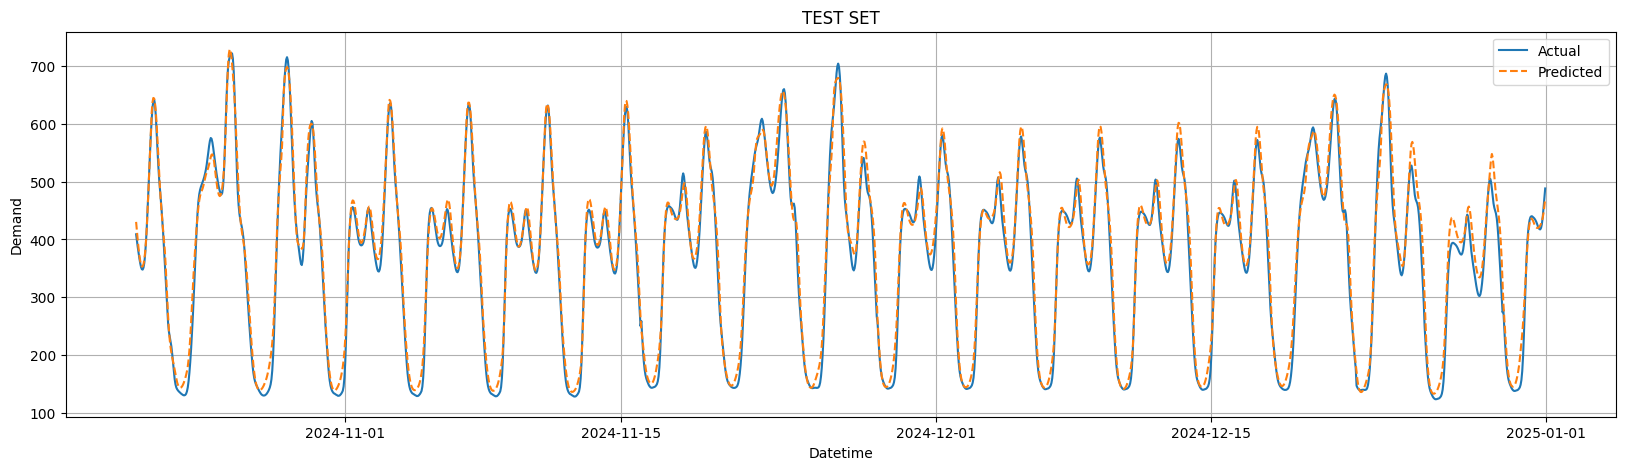


========== 24-HOUR FORECAST ==========

              Datetime  Forecasted_Demand
0  2025-01-01 00:00:00         471.044373
1  2025-01-01 01:00:00         478.748260
2  2025-01-01 02:00:00         485.220001
3  2025-01-01 03:00:00         490.427948
4  2025-01-01 04:00:00         494.439758
5  2025-01-01 05:00:00         497.459961
6  2025-01-01 06:00:00         499.776703
7  2025-01-01 07:00:00         501.706635
8  2025-01-01 08:00:00         503.539032
9  2025-01-01 09:00:00         505.534241
10 2025-01-01 10:00:00         507.975586
11 2025-01-01 11:00:00         511.204803
12 2025-01-01 12:00:00         515.621094
13 2025-01-01 13:00:00         521.616211
14 2025-01-01 14:00:00         529.492676
15 2025-01-01 15:00:00         539.390320
16 2025-01-01 16:00:00         551.244568
17 2025-01-01 17:00:00         564.781189
18 2025-01-01 18:00:00         579.555176
19 2025-01-01 19:00:00         594.985657
20 2025-01-01 20:00:00         610.415955
21 2025-01-01 21:00:00         625.

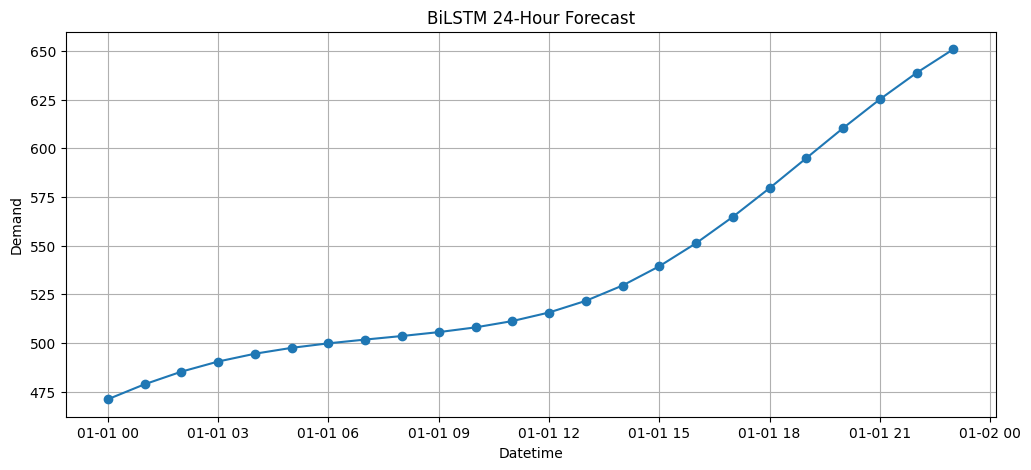


Model saved as folder: bilstm_demand_model.keras/
Model saved as: bilstm_demand_model.h5

Scalers saved: scaler_X.pkl  and  scaler_y.pkl


In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from kerastuner.tuners import RandomSearch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import timedelta

# ============================================
# 1. CLEAN DATETIME
# ============================================

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['hour'] = df['hour'].astype(str).str.extract(r'(\d{1,2})')[0].astype(int)

if 'Datetime' in df.columns:
    df = df.drop(columns=['Datetime'])

df['Datetime'] = df['date'] + pd.to_timedelta(df['hour'], unit='h')
df = df.sort_values('Datetime').set_index('Datetime')
df = df.asfreq('H')

# ============================================
# 2. REMOVE USELESS COLUMNS
# ============================================

drop_cols = ['Demand_Trend', 'Demand_Seasonal', 'Demand_Residual']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# ============================================
# 3. FEATURE ENGINEERING
# ============================================

target = 'Demand'

df['lag_1']   = df[target].shift(1)
df['lag_24']  = df[target].shift(24)
df['lag_168'] = df[target].shift(168)

df['rolling_mean_24']  = df[target].rolling(24).mean()
df['rolling_mean_168'] = df[target].rolling(168).mean()

df = df.dropna()

# ============================================
# 4. FEATURES
# ============================================

candidate_features = [
    'Demand',
    'Year', 'Month', 'Day', 'Day_Encoded',
    'lag_1', 'lag_24', 'lag_168',
    'rolling_mean_24', 'rolling_mean_168'
]

features = [c for c in candidate_features if c in df.columns]
print("Using features:", features)

# ============================================
# 5. BUILD X, y
# ============================================

X = df[features].values
y = df[target].values

# ============================================
# 6. CREATE SEQUENCES
# ============================================

def create_sequences(X, y, time_steps=24):
    xs, ys = [], []
    for i in range(len(X) - time_steps):
        xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(xs), np.array(ys)

time_steps = 24
X_seq, y_seq = create_sequences(X, y, time_steps)

# ============================================
# 7. SPLIT
# ============================================

train_size = int(len(X_seq) * 0.6)
val_size   = int(len(X_seq) * 0.2)

X_train, y_train = X_seq[:train_size], y_seq[:train_size]
X_val,   y_val   = X_seq[train_size:train_size+val_size], y_seq[train_size:train_size+val_size]
X_test,  y_test  = X_seq[train_size+val_size:], y_seq[train_size+val_size:]

# ============================================
# 8. SCALING
# ============================================

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, len(features))).reshape(X_train.shape)
X_val_scaled   = scaler_X.transform(X_val.reshape(-1, len(features))).reshape(X_val.shape)
X_test_scaled  = scaler_X.transform(X_test.reshape(-1, len(features))).reshape(X_test.shape)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).ravel()
y_val_scaled   = scaler_y.transform(y_val.reshape(-1,1)).ravel()
y_test_scaled  = scaler_y.transform(y_test.reshape(-1,1)).ravel()

# ============================================
# 9. MODEL + TUNER  (UPDATED TO SIMPLE LSTM)
# ============================================

def build_model(hp):
    model = Sequential()

    # First LSTM
    model.add(
        LSTM(
            hp.Int("units1", 64, 256, step=64),
            return_sequences=True,
            kernel_regularizer=l2(hp.Choice("l2_reg", [0.001, 0.005])),
            input_shape=(24, len(features))
        )
    )
    model.add(Dropout(hp.Choice("dropout1", [0.2, 0.3, 0.4])))

    # Second LSTM
    model.add(
        LSTM(
            hp.Int("units2", 32, 128, step=32),
            kernel_regularizer=l2(hp.Choice("l2_reg", [0.001, 0.005]))
        )
    )
    model.add(Dropout(hp.Choice("dropout2", [0.2, 0.3, 0.4])))

    # Output layer
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(hp.Choice("lr", [1e-3, 5e-4, 1e-4])),
        loss="mse"
    )
    return model


tuner = RandomSearch(
    build_model,
    objective="val_loss",
    max_trials=8,
    directory="lstm_tuner",
    project_name="demand_lstm"
)

tuner.search(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=50,
    batch_size=64,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
)

best_hp = tuner.get_best_hyperparameters(1)[0]

print("\n============================")
print(" BEST HYPERPARAMETERS FOUND ")
print("============================")
for p in best_hp.values:
    print(p)

# ---- Build Final Model ----
model = tuner.hypermodel.build(best_hp)

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=50,
    batch_size=64,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
)

# ============================================
# 10. EVALUATION
# ============================================

def evaluate(model, X, y, name):
    y_pred_scaled = model.predict(X, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y.reshape(-1,1))

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{name} MSE = {mse:.4f}")
    print(f"{name} RMSE = {rmse:.4f}")
    print(f"{name} MAE = {mae:.4f}")
    print(f"{name} R²  = {r2:.4f}")

    return y_pred.ravel()

y_train_pred = evaluate(model, X_train_scaled, y_train_scaled, "TRAIN")
y_val_pred   = evaluate(model, X_val_scaled,   y_val_scaled,   "VAL")
y_test_pred  = evaluate(model, X_test_scaled,  y_test_scaled,  "TEST")

# ============================================
# 11. PLOTS
# ============================================

dates_all = df.index[time_steps: time_steps + len(X_seq)]

train_dates = dates_all[:train_size]
val_dates   = dates_all[train_size:train_size+val_size]
test_dates  = dates_all[train_size+val_size:]

def plot_actual_vs_predicted(dates, true, pred, title):
    plt.figure(figsize=(20,5))
    plt.plot(dates, true, label="Actual")
    plt.plot(dates, pred, label="Predicted", linestyle="--")
    plt.title(title)
    plt.xlabel("Datetime")
    plt.ylabel("Demand")
    plt.grid()
    plt.legend()
    plt.show()

plot_actual_vs_predicted(train_dates, y_train, y_train_pred, "TRAIN SET")
plot_actual_vs_predicted(val_dates,   y_val,   y_val_pred,   "VALIDATION SET")
plot_actual_vs_predicted(test_dates,  y_test,  y_test_pred,  "TEST SET")

# ============================================
# 12. 24-HOUR FORECAST (FINAL)
# ============================================

last_seq = X_seq[-1]
last_seq_scaled = scaler_X.transform(last_seq).reshape(1, 24, len(features))

forecast = []
forecast_dates = []
start_dt = df.index[-1] + timedelta(hours=1)

current = last_seq_scaled.copy()

for i in range(24):

    pred_scaled = model.predict(current, verbose=0)
    pred_unscaled = scaler_y.inverse_transform(pred_scaled)[0,0]

    forecast.append(pred_unscaled)
    forecast_dates.append(start_dt + timedelta(hours=i))

    next_vec = current[0, -1, :].copy()
    next_vec[features.index(target)] = pred_scaled[0, 0]

    current = np.roll(current, -1, axis=1)
    current[0, -1, :] = next_vec

# ========= PRINT FORECAST TABLE ==========
forecast_df = pd.DataFrame({
    "Datetime": forecast_dates,
    "Forecasted_Demand": forecast
})
print("\n========== 24-HOUR FORECAST ==========\n")
print(forecast_df)

# ========= PLOT ==========
plt.figure(figsize=(12,5))
plt.plot(forecast_dates, forecast, marker='o')
plt.title("24-Hour Forecast")
plt.xlabel("Datetime")
plt.ylabel("Demand")
plt.grid()
plt.show()

# ============================================
# 13. SAVE MODEL
# ============================================

model.save("simple_lstm_model.keras")
model.save("simple_lstm_model.h5")
print("\nModel saved as simple_lstm_model.*")

import joblib
joblib.dump(scaler_X, "scaler_X.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")

print("\nScalers saved successfully.")


#**Gru Final**

Using features: ['Demand', 'Year', 'Month', 'Day', 'Day_Encoded', 'lag_1', 'lag_24', 'lag_168', 'rolling_mean_24', 'rolling_mean_168']
Reloading Tuner from bigru_tuner/demand_bigru/tuner0.json

 BEST HYPERPARAMETERS FOUND (BiGRU)
units1
l2_reg
dropout1
units2
dropout2
lr
Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 163ms/step - loss: 0.3786 - val_loss: 0.1312
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - loss: 0.1160 - val_loss: 0.0759
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 161ms/step - loss: 0.0715 - val_loss: 0.0526
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - loss: 0.0506 - val_loss: 0.0386
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - loss: 0.0372 - val_loss: 0.0284
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 13s 155ms/step - loss: 0.0283 - val_loss: 0.0216
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - loss: 0.0217 - val_loss: 0.0169
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 13s 160ms/step - loss: 0.0171 - val_loss: 0.0143
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━

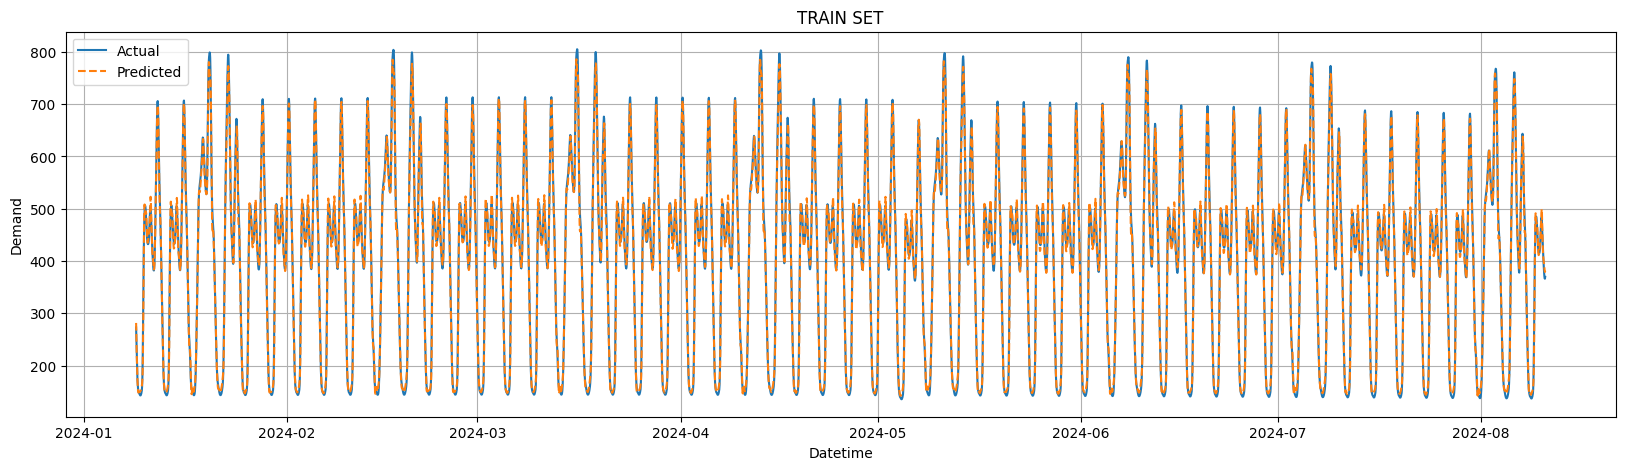

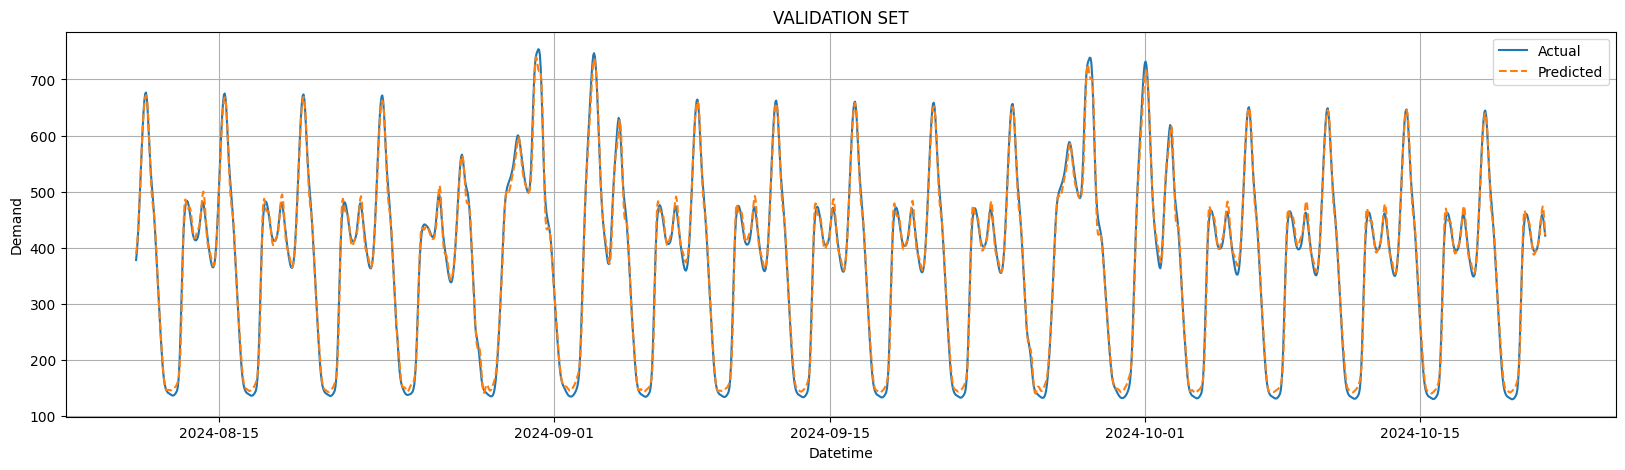

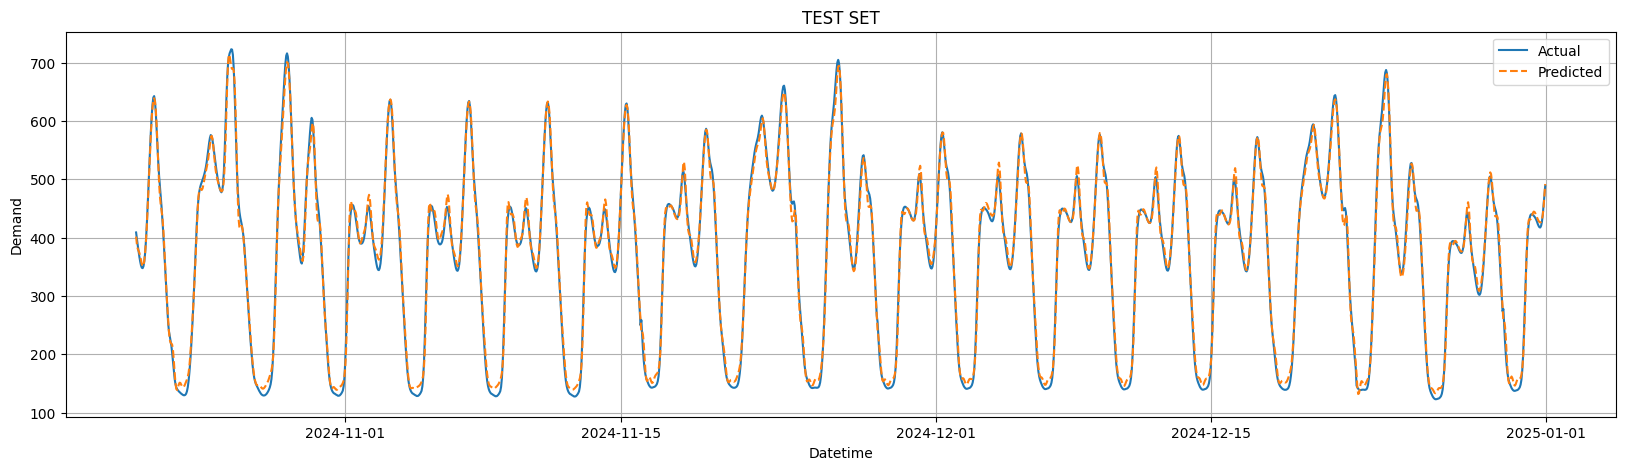


========== 24-HOUR FORECAST ==========

              Datetime  Forecasted_Demand
0  2025-01-01 00:00:00         491.905975
1  2025-01-01 01:00:00         507.695282
2  2025-01-01 02:00:00         516.655518
3  2025-01-01 03:00:00         517.337463
4  2025-01-01 04:00:00         509.533081
5  2025-01-01 05:00:00         494.220093
6  2025-01-01 06:00:00         473.394958
7  2025-01-01 07:00:00         449.674255
8  2025-01-01 08:00:00         425.832581
9  2025-01-01 09:00:00         404.422607
10 2025-01-01 10:00:00         387.492371
11 2025-01-01 11:00:00         376.423615
12 2025-01-01 12:00:00         371.914429
13 2025-01-01 13:00:00         374.034790
14 2025-01-01 14:00:00         382.308777
15 2025-01-01 15:00:00         395.817383
16 2025-01-01 16:00:00         413.298889
17 2025-01-01 17:00:00         433.229218
18 2025-01-01 18:00:00         453.909454
19 2025-01-01 19:00:00         473.566620
20 2025-01-01 20:00:00         490.472534
21 2025-01-01 21:00:00         503.

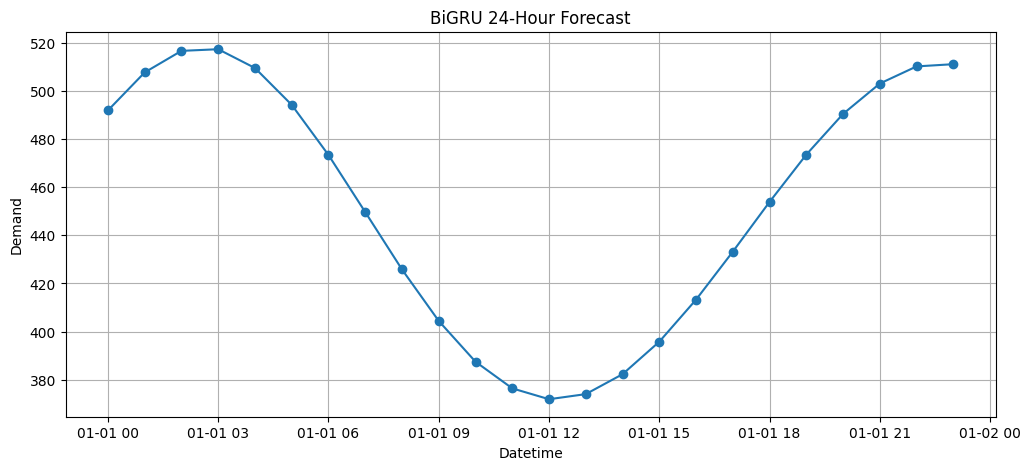

Saved model as: bigru_demand_model.keras
Saved model as: bigru_demand_model.h5
Saved scalers: scaler_X.pkl, scaler_y.pkl


In [ ]:
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from kerastuner.tuners import RandomSearch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import timedelta
import joblib

# ============================================
# 1. CLEAN DATETIME
# ============================================

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['hour'] = df['hour'].astype(str).str.extract(r'(\d{1,2})')[0].astype(int)

if 'Datetime' in df.columns:
    df = df.drop(columns=['Datetime'])

df['Datetime'] = df['date'] + pd.to_timedelta(df['hour'], unit='h')
df = df.sort_values('Datetime').set_index('Datetime')
df = df.asfreq('H')

# ============================================
# 2. REMOVE USELESS COLUMNS
# ============================================

drop_cols = ['Demand_Trend', 'Demand_Seasonal', 'Demand_Residual']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# ============================================
# 3. FEATURE ENGINEERING
# ============================================

target = 'Demand'

df['lag_1']   = df[target].shift(1)
df['lag_24']  = df[target].shift(24)
df['lag_168'] = df[target].shift(168)

df['rolling_mean_24']  = df[target].rolling(24).mean()
df['rolling_mean_168'] = df[target].rolling(168).mean()

df = df.dropna()

# ============================================
# 4. FEATURES
# ============================================

candidate_features = [
    'Demand',
    'Year', 'Month', 'Day', 'Day_Encoded',
    'lag_1', 'lag_24', 'lag_168',
    'rolling_mean_24', 'rolling_mean_168'
]

features = [c for c in candidate_features if c in df.columns]
print("Using features:", features)

# ============================================
# 5. BUILD X, y
# ============================================

X = df[features].values
y = df[target].values

# ============================================
# 6. CREATE SEQUENCES
# ============================================

def create_sequences(X, y, time_steps=24):
    xs, ys = [], []
    for i in range(len(X) - time_steps):
        xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(xs), np.array(ys)

time_steps = 24
X_seq, y_seq = create_sequences(X, y, time_steps)

# ============================================
# 7. SPLIT
# ============================================

train_size = int(len(X_seq) * 0.6)
val_size   = int(len(X_seq) * 0.2)

X_train, y_train = X_seq[:train_size], y_seq[:train_size]
X_val,   y_val   = X_seq[train_size:train_size+val_size], y_seq[train_size:train_size+val_size]
X_test,  y_test  = X_seq[train_size+val_size:], y_seq[train_size+val_size:]

# ============================================
# 8. SCALING
# ============================================

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, len(features))).reshape(X_train.shape)
X_val_scaled   = scaler_X.transform(X_val.reshape(-1, len(features))).reshape(X_val.shape)
X_test_scaled  = scaler_X.transform(X_test.reshape(-1, len(features))).reshape(X_test.shape)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).ravel()
y_val_scaled   = scaler_y.transform(y_val.reshape(-1,1)).ravel()
y_test_scaled  = scaler_y.transform(y_test.reshape(-1,1)).ravel()

# ============================================
# 9. MODEL + TUNER (SIMPLE GRU)
# ============================================

def build_model(hp):
    model = Sequential()

    # First GRU Layer
    model.add(
        GRU(
            hp.Int("units1", 64, 256, step=64),
            return_sequences=True,
            kernel_regularizer=l2(hp.Choice("l2_reg", [0.001, 0.005])),
            input_shape=(24, len(features))
        )
    )
    model.add(Dropout(hp.Choice("dropout1", [0.2, 0.3, 0.4])))

    # Second GRU Layer
    model.add(
        GRU(
            hp.Int("units2", 32, 128, step=32),
            kernel_regularizer=l2(hp.Choice("l2_reg", [0.001, 0.005]))
        )
    )
    model.add(Dropout(hp.Choice("dropout2", [0.2, 0.3, 0.4])))

    # Output Layer
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(hp.Choice("lr", [1e-3, 5e-4, 1e-4])),
        loss="mse"
    )
    return model


tuner = RandomSearch(
    build_model,
    objective="val_loss",
    max_trials=8,
    directory="gru_tuner",
    project_name="demand_gru"
)

tuner.search(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=50,
    batch_size=64,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
)

best_hp = tuner.get_best_hyperparameters(1)[0]
print("\n============================")
print(" BEST HYPERPARAMETERS FOUND (SIMPLE GRU)")
print("============================")
for p in best_hp.values:
    print(p)

# Rebuild best model
model = tuner.hypermodel.build(best_hp)

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=50,
    batch_size=64,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
)

# ============================================
# 10. EVALUATION
# ============================================

def evaluate(model, X, y, name):
    y_pred_scaled = model.predict(X, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y.reshape(-1,1))

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{name} MSE = {mse:.4f}")
    print(f"{name} RMSE = {rmse:.4f}")
    print(f"{name} MAE = {mae:.4f}")
    print(f"{name} R²  = {r2:.4f}")

    return y_pred.ravel()

y_train_pred = evaluate(model, X_train_scaled, y_train_scaled, "TRAIN")
y_val_pred   = evaluate(model, X_val_scaled,   y_val_scaled,   "VAL")
y_test_pred  = evaluate(model, X_test_scaled,  y_test_scaled,  "TEST")

# ============================================
# 11. PLOTS
# ============================================

dates_all = df.index[time_steps: time_steps + len(X_seq)]

train_dates = dates_all[:train_size]
val_dates   = dates_all[train_size:train_size+val_size]
test_dates  = dates_all[train_size+val_size:]

def plot_actual_vs_predicted(dates, true, pred, title):
    plt.figure(figsize=(20,5))
    plt.plot(dates, true, label="Actual")
    plt.plot(dates, pred, label="Predicted", linestyle="--")
    plt.title(title)
    plt.xlabel("Datetime")
    plt.ylabel("Demand")
    plt.grid()
    plt.legend()
    plt.show()

plot_actual_vs_predicted(train_dates, y_train, y_train_pred, "TRAIN SET")
plot_actual_vs_predicted(val_dates,   y_val,   y_val_pred,   "VALIDATION SET")
plot_actual_vs_predicted(test_dates,  y_test,  y_test_pred,  "TEST SET")

# ============================================
# 12. 24-HOUR FORECAST (FINAL)
# ============================================

last_seq = X_seq[-1]
last_seq_scaled = scaler_X.transform(last_seq).reshape(1, 24, len(features))

forecast = []
forecast_dates = []
start_dt = df.index[-1] + timedelta(hours=1)

current = last_seq_scaled.copy()

for i in range(24):

    pred_scaled = model.predict(current, verbose=0)
    pred_unscaled = scaler_y.inverse_transform(pred_scaled)[0,0]

    forecast.append(pred_unscaled)
    forecast_dates.append(start_dt + timedelta(hours=i))

    next_vec = current[0, -1, :].copy()
    next_vec[features.index(target)] = pred_scaled[0, 0]

    current = np.roll(current, -1, axis=1)
    current[0, -1, :] = next_vec

forecast_df = pd.DataFrame({
    "Datetime": forecast_dates,
    "Forecasted_Demand": forecast
})
print("\n========== 24-HOUR FORECAST ==========\n")
print(forecast_df)

plt.figure(figsize=(12,5))
plt.plot(forecast_dates, forecast, marker='o')
plt.title("GRU 24-Hour Forecast")
plt.xlabel("Datetime")
plt.ylabel("Demand")
plt.grid()
plt.show()

# ============================================
# 13. SAVE MODEL
# ============================================

model.save("simple_gru_model.keras")
print("Saved model as: simple_gru_model.keras")

model.save("simple_gru_model.h5")
print("Saved model as: simple_gru_model.h5")

joblib.dump(scaler_X, "scaler_X.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")
print("Saved scalers: scaler_X.pkl, scaler_y.pkl")
